### Librerias Utilizadas 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import geopandas as gpd
from shapely.geometry import Point

## Carga de Datos

Hemos cargado los datos desde el archivo Excel `Acc_vel_loc_sinrangos`. A continuación, se muestran df_01

In [4]:
# Cargar el archivo Excel con las dos primeras hojas
file_path = 'Internet.xlsx'

# Cargar solo las dos primeras hojas en DataFrames separados
df_01 = pd.read_excel(file_path, sheet_name=0)  # Cargar la primera hoja

In [31]:
df_01

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
31,BUENOS AIRES,Almirante Brown,Adrogué,6028010,NaN,1.0,10.0,1.0,34.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,325.0,NaN,NaN,NaN
32,BUENOS AIRES,Almirante Brown,Burzaco,6028010,53.0,1.0,9.0,1.0,23.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1030.0,NaN,NaN,NaN
35,BUENOS AIRES,Almirante Brown,Glew,6028010,1.0,NaN,5.0,NaN,7.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,741.0,NaN,NaN,NaN
44,BUENOS AIRES,Arrecifes,Arrecifes,6077010,159.0,NaN,1.0,NaN,6.0,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN
47,BUENOS AIRES,Avellaneda,Avellaneda,6035010,34.0,NaN,8.0,5.0,43.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,284.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,SANTA FE,Rosario,Rosario,82084270,92.0,NaN,8.0,1.0,2.0,1145.0,...,NaN,NaN,NaN,NaN,NaN,1.0,444.0,1.0,NaN,NaN
2830,SANTA FE,San Martín,San Jorge,82126140,9.0,NaN,1.0,NaN,NaN,316.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2890,SANTIAGO DEL ESTERO,Capital,Santiago del Estero,86049110,35.0,NaN,4.0,1.0,908.0,172.0,...,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN
2991,TIERRA DEL FUEGO,Río Grande,Río Grande,94007010,5137.0,NaN,8.0,9.0,198.0,514.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Distribución de Velocidades de Internet por Tipo de Conexión
Se han analizado las distribuciones de las velocidades de Internet para diferentes tipos de conexión utilizando histogramas. Esto proporciona una visión clara de la cobertura y la calidad del servicio en las diferentes categorías de velocidad.



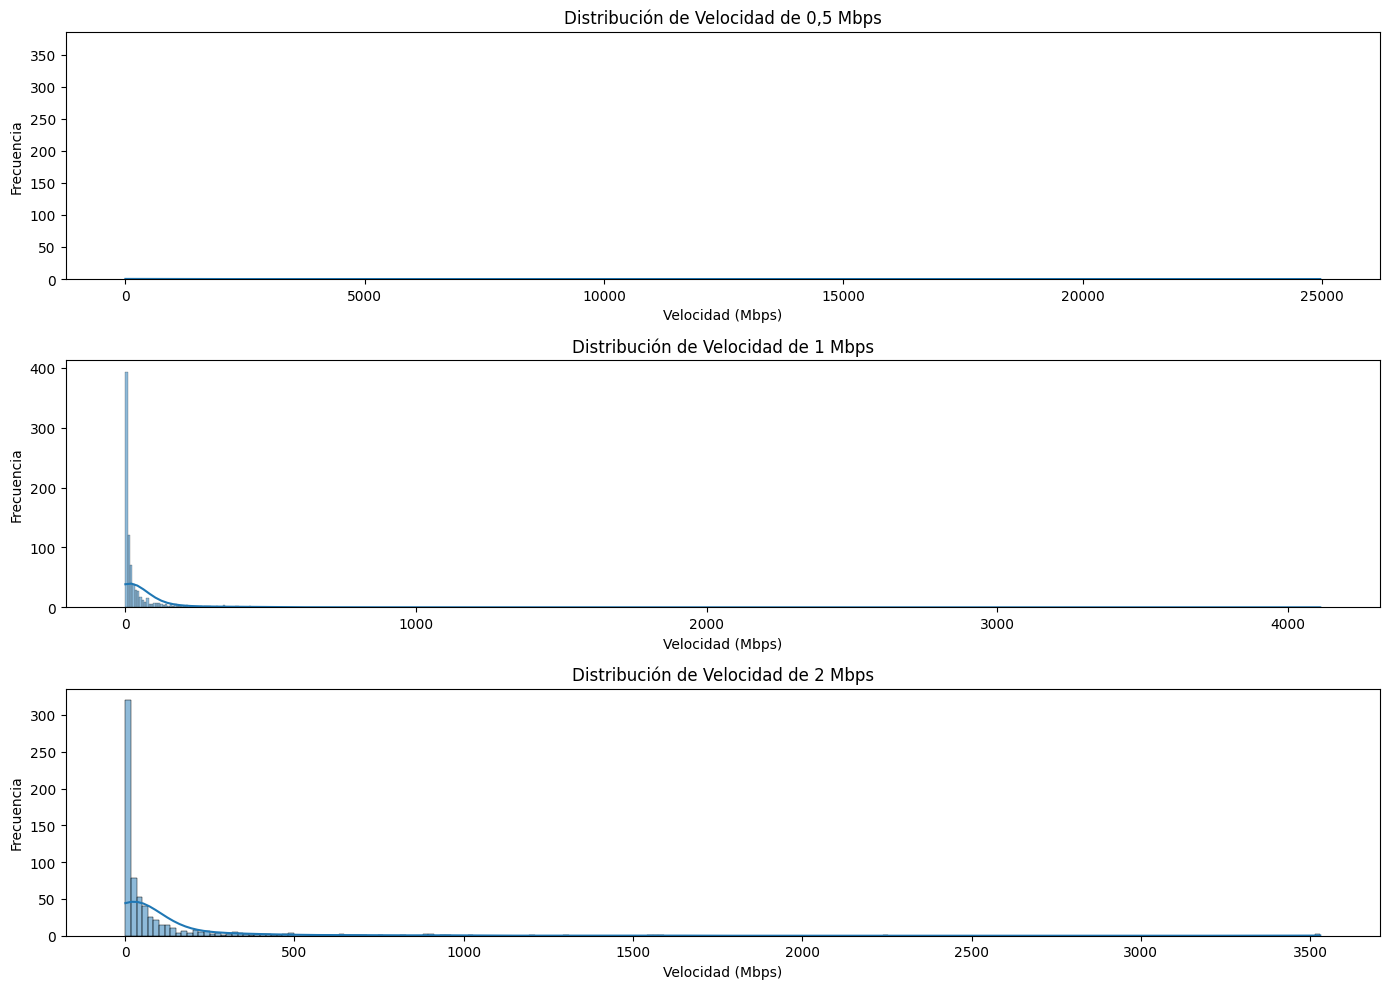

In [5]:
plt.figure(figsize=(14, 10))

# Graficar histogramas para cada tipo de velocidad
for i, col in enumerate(['0,5 Mbps', '1 Mbps', '2 Mbps']):
    plt.subplot(3, 1, i+1)
    sns.histplot(df_01[col].dropna(), kde=True)
    plt.title(f'Distribución de Velocidad de {col}')
    plt.xlabel('Velocidad (Mbps)')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


### Conclusion
Distribución de Velocidad de 0.5 Mbps:

En este gráfico, la mayoría de las velocidades registradas están en el extremo más bajo, alrededor de 0.5 Mbps.
Parece que hay pocos valores altos de velocidad; la curva cae rápidamente hacia la izquierda.
Esto sugiere que la conexión a Internet en esta muestra tiende a ser bastante lenta.

Distribución de Velocidad de 1 Mbps:

Aquí también vemos una concentración de velocidades bajas, pero no tan extrema como en el gráfico anterior.
La curva es más suave, lo que indica una mayor variabilidad en las velocidades.
Aunque hay algunos valores más altos, siguen siendo relativamente escasos.

Distribución de Velocidad de 2 Mbps:

En este gráfico, nuevamente observamos que la mayoría de las velocidades están en el extremo inferior.
La curva es aún más suave, lo que sugiere una mayor dispersión de velocidades.
Aunque hay algunos valores más altos, siguen siendo poco comunes.

### Comparación de Velocidades por Provincia
El gráfico de barras muestra la velocidad promedio de 1 Mbps por provincia, facilitando la comparación de la calidad del servicio entre diferentes regiones.


Provincia      object
Partido        object
Localidad      object
Link Indec     object
Otros         float64
               ...   
999 Mbps      float64
1000 Mbps     float64
1024 Mbps     float64
4000 Mbps     float64
10000 Mbps    float64
Length: 125, dtype: object
                           Otros  0,256 Mbps    0,5 Mbps  0,512 Mbps  \
Provincia                                                              
BUENOS AIRES          115.734375    1.333333    8.666667    3.218750   
CABA                    0.000000   31.000000  451.000000   34.000000   
CHACO                  36.000000         NaN    3.000000    1.000000   
CHUBUT               3708.666667    3.000000    4.000000   15.500000   
CORDOBA                43.500000    2.000000    2.833333    8.000000   
CORRIENTES           1054.000000         NaN    1.000000    1.666667   
ENTRE RIOS            440.800000         NaN    1.272727    8.000000   
FORMOSA                63.000000         NaN    3.250000         NaN   
JUJUY      

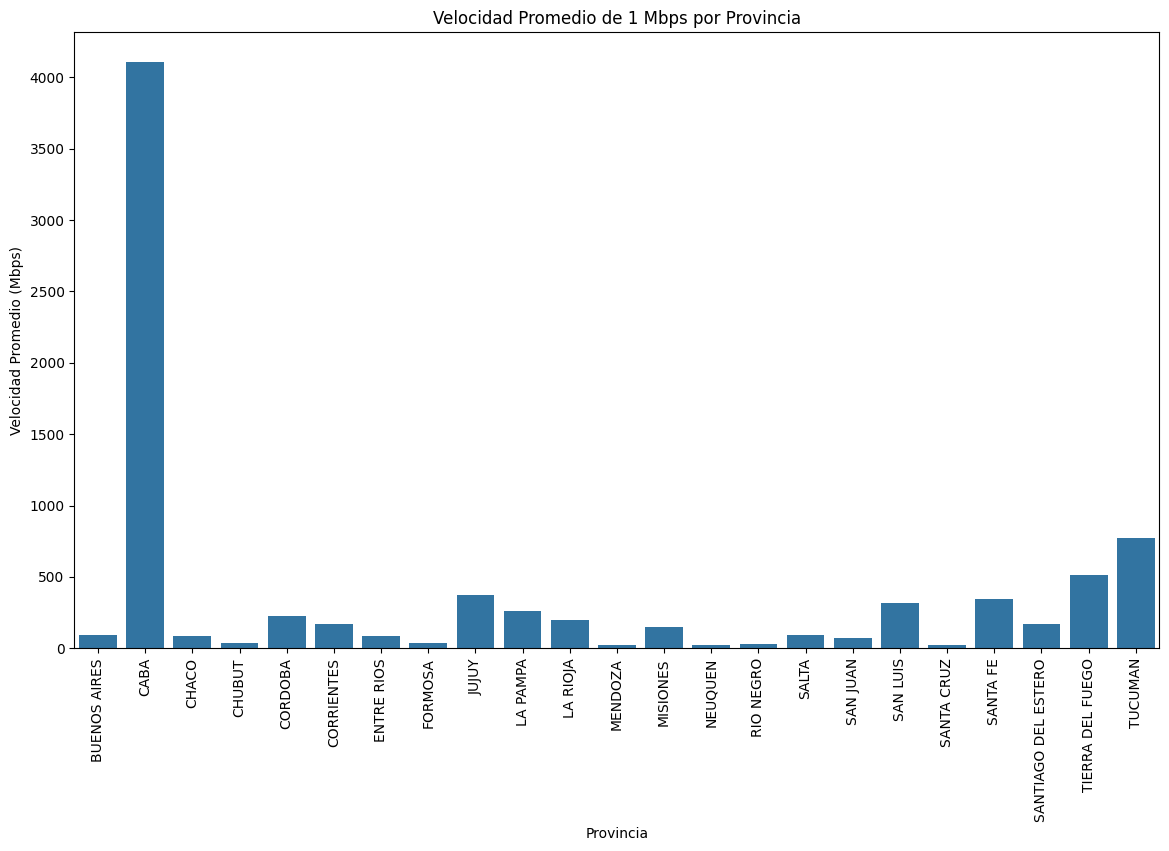

In [9]:
# Verifique los tipos de datos
print(df_01.dtypes)

# Converti las columnas de velocidad a numérico, si no lo son
df_01['0,5 Mbps'] = pd.to_numeric(df_01['0,5 Mbps'], errors='coerce')
df_01['1 Mbps'] = pd.to_numeric(df_01['1 Mbps'], errors='coerce')
df_01['2 Mbps'] = pd.to_numeric(df_01['2 Mbps'], errors='coerce')

# Limpie valores faltantes
df_01.dropna(subset=['0,5 Mbps', '1 Mbps', '2 Mbps'], inplace=True)

# Verifique que solo se agrupen columnas numéricas
numeric_columns = df_01.select_dtypes(include=['number']).columns

# Calcule la velocidad promedio por provincia
average_speeds = df_01.groupby('Provincia')[numeric_columns].mean()

# Mostrar las velocidades promedio calculadas
print(average_speeds)

# Graficar la velocidad promedio de 1 Mbps por provincia
plt.figure(figsize=(14, 8))
sns.barplot(x=average_speeds.index, y=average_speeds['1 Mbps'])
plt.xticks(rotation=90)
plt.title('Velocidad Promedio de 1 Mbps por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Velocidad Promedio (Mbps)')
plt.show()


### Conclusion 
"Al observar el gráfico de velocidad promedio de 1 Mbps por provincia, puedo ver claramente cómo varía la velocidad de conexión entre diferentes provincias. Algunas provincias tienen velocidades significativamente mayores, lo que podría indicar una mejor infraestructura de red en esas áreas. En cambio, otras provincias tienen velocidades más bajas, sugiriendo que podrían necesitar mejoras en su conectividad. Este gráfico me ayuda a identificar dónde podría ser más efectivo enfocar los esfuerzos para mejorar la velocidad de internet."

### Análisis de Valores Atípicos en Velocidades
Los boxplots se utilizan para identificar valores atípicos en las velocidades de Internet, proporcionando una visión de los valores extremos y posibles problemas en los datos.


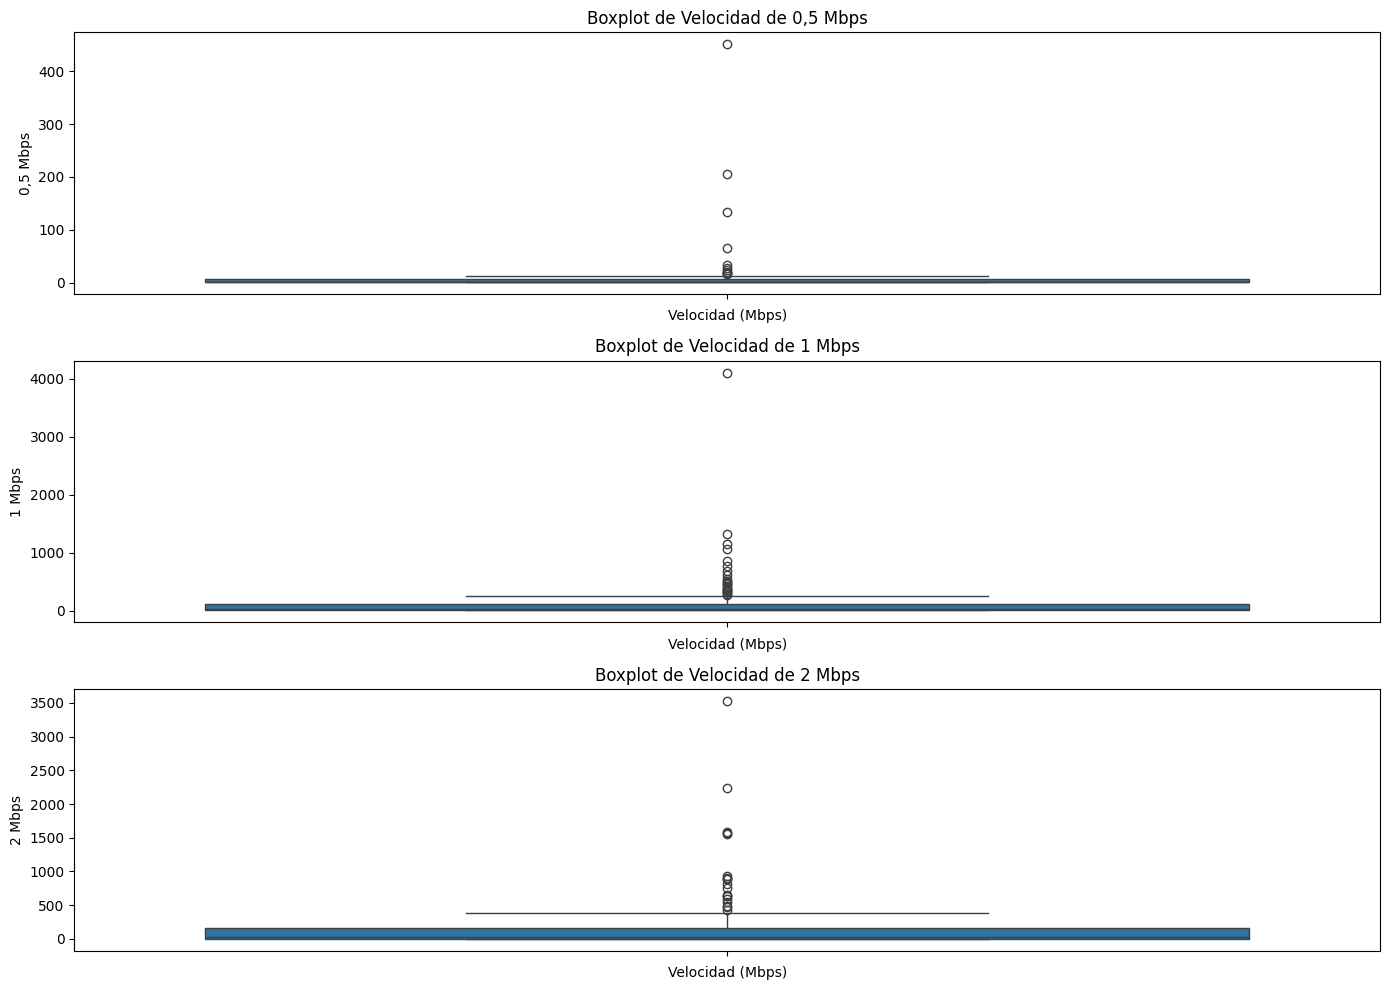

In [10]:
plt.figure(figsize=(14, 10))

# Crear boxplots para cada columna de velocidad
for i, col in enumerate(['0,5 Mbps', '1 Mbps', '2 Mbps']):
    plt.subplot(3, 1, i+1)
    sns.boxplot(df_01[col])
    plt.title(f'Boxplot de Velocidad de {col}')
    plt.xlabel('Velocidad (Mbps)')

plt.tight_layout()
plt.show()


### Conclusion
Boxplot de Velocidad de 0,5 Mbps

"Al analizar el boxplot de velocidad de 0,5 Mbps, puedo ver que la mayoría de los datos se concentran en un rango bastante estrecho, con algunas excepciones notables. La presencia de valores atípicos sugiere que hay provincias con velocidades inusualmente bajas. Esto me indica que la calidad de la conexión de 0,5 Mbps no es uniforme y que hay áreas donde la velocidad es considerablemente más baja que en otras."

Boxplot de Velocidad de 1 Mbps

"En el boxplot de velocidad de 1 Mbps, puedo observar que la distribución de velocidades es más amplia en comparación con el boxplot de 0,5 Mbps. La mediana está más centrada y los valores atípicos parecen ser menos frecuentes. Esto sugiere que la velocidad de 1 Mbps es más constante y que, en general, la mayoría de las provincias experimentan una velocidad más estable en comparación con la de 0,5 Mbps."

Boxplot de Velocidad de 2 Mbps

"El boxplot para la velocidad de 2 Mbps muestra una distribución aún más amplia y algunos valores atípicos notables. La mediana es más alta, lo que indica que muchas provincias tienen velocidades que se acercan o superan los 2 Mbps. Sin embargo, también hay algunos datos extremos que sugieren que en ciertas áreas la velocidad puede ser mucho más baja. Esto me lleva a pensar que, aunque la velocidad de 2 Mbps es más alta en general, todavía hay provincias con problemas significativos de conectividad."

### Correlación entre Velocidades de Internet
La matriz de correlación muestra la relación entre diferentes tipos de velocidades de Internet, permitiendo identificar posibles dependencias o patrones en los datos.


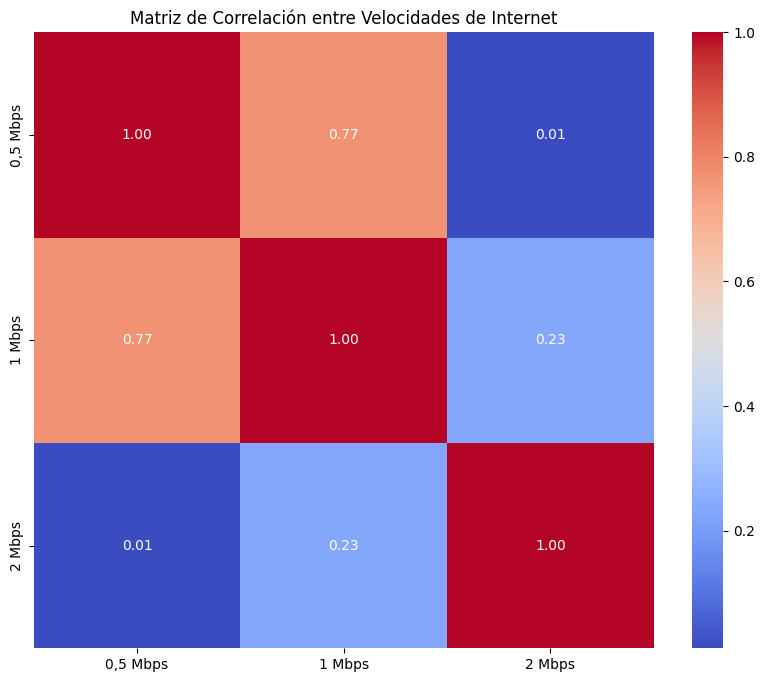

In [21]:
# Calcular la matriz de correlación
correlation_matrix = df_01[['0,5 Mbps', '1 Mbps', '2 Mbps']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Velocidades de Internet')
plt.show()


### Conclusion
"Al observar la matriz de correlación entre las velocidades de 0,5 Mbps, 1 Mbps y 2 Mbps, puedo ver claramente cómo se relacionan entre sí. Las correlaciones positivas que aparecen en el gráfico indican que, en general, a medida que aumenta la velocidad en una de las categorías, también tiende a aumentar en las otras. Esto sugiere que las provincias con mejores velocidades en 0,5 Mbps también suelen tener mejores velocidades en 1 Mbps y 2 Mbps. La correlación más fuerte entre 1 Mbps y 2 Mbps me dice que hay una relación más directa entre estas dos velocidades, lo que es consistente con la idea de que una velocidad más alta generalmente está asociada con una velocidad de 2 Mbps. Esta matriz me proporciona una visión general útil de cómo las diferentes velocidades de internet están relacionadas en mi conjunto de datos."

## Carga de Datos

Hemos cargado los datos desde el archivo Excel `Velocidad_sin_Rangos.xlsx`. A continuación, se muestran df_02

In [22]:
# Cargar el archivo Excel con las dos primeras hojas
file_path = 'Internet.xlsx'

# Cargar solo las dos primeras hojas en DataFrames separados

df_02 = pd.read_excel(file_path, sheet_name=1)  # Cargar la segunda hoja

## Análisis de la Velocidad Promedio de Internet por Provincia

Para comprender cómo varía la velocidad promedio de internet entre las provincias, hemos calculado la velocidad promedio de internet para cada una. A continuación se presenta un gráfico de barras que muestra la velocidad promedio por provincia.

C:\Users\Luis Fernando Martin\AppData\Local\Temp\ipykernel_18444\1429782603.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=provincia_avg_speed.index, y=provincia_avg_speed.values, palette='viridis')


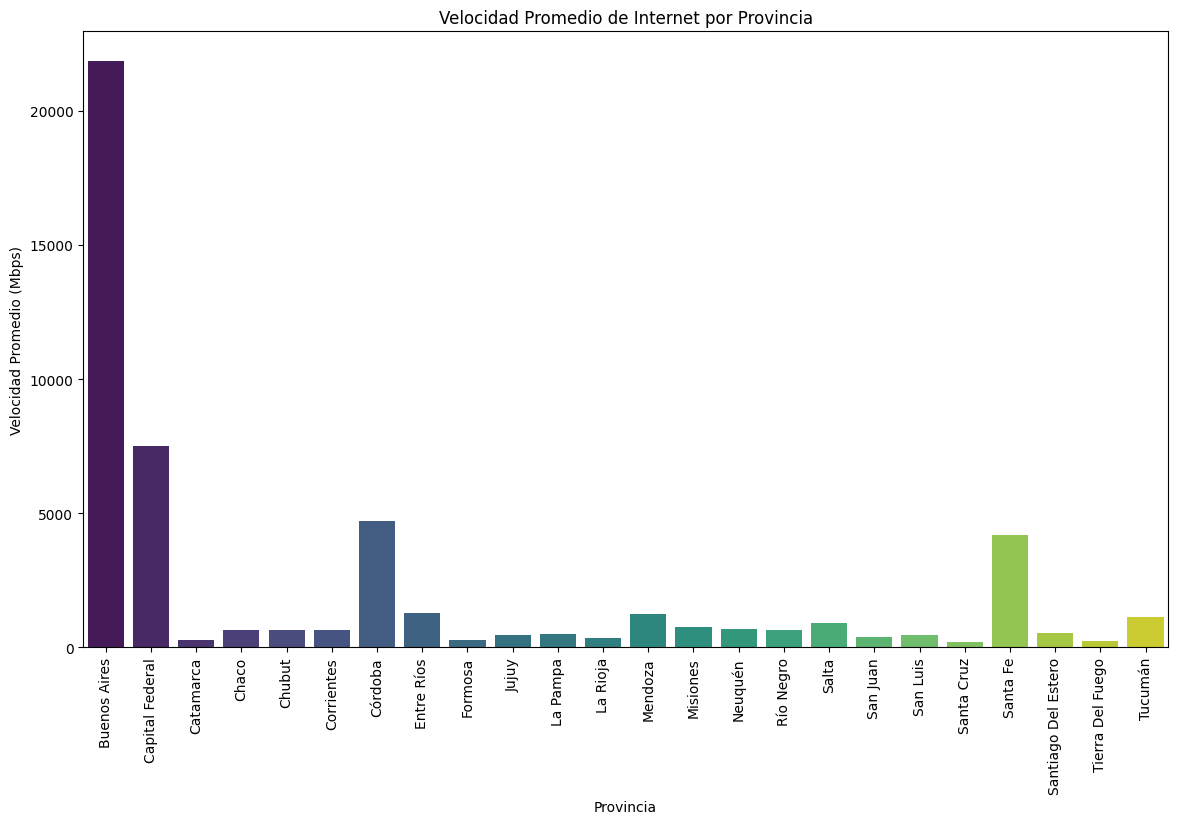

In [23]:
# Calcular la velocidad promedio por provincia
provincia_avg_speed = df_02.groupby('Provincia').mean().filter(like='Mbps').mean(axis=1)

# Graficar
plt.figure(figsize=(14, 8))
sns.barplot(x=provincia_avg_speed.index, y=provincia_avg_speed.values, palette='viridis')
plt.title('Velocidad Promedio de Internet por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Velocidad Promedio (Mbps)')
plt.xticks(rotation=90)
plt.show()


### Conclusion 
"Al revisar el gráfico de velocidad promedio de internet por provincia, puedo observar cómo varía la velocidad promedio de internet entre diferentes provincias. Las provincias con colores más claros tienen velocidades promedio más altas, mientras que las más oscuras indican velocidades promedio más bajas. Esto me permite identificar fácilmente cuáles provincias tienen una mejor conectividad en general y cuáles podrían necesitar mejoras. Puedo ver que algunas provincias destacan por tener velocidades significativamente superiores a otras, lo que podría señalar áreas donde se ha invertido más en infraestructura de internet. Este gráfico me proporciona una visión clara de las disparidades en la velocidad de internet entre las provincias y me ayuda a enfocar mis esfuerzos en las áreas que más lo necesitan."

### . Tendencia de Velocidades a lo Largo del Tiempo

**Idea**: Visualizar cómo han cambiado las velocidades de Internet a lo largo del tiempo (años y trimestres) para identificar tendencias y posibles mejoras o deterioros.

**Gráfico**: Lineplot mostrando la tendencia de la velocidad total por año y trimestre.

<Figure size 1400x800 with 0 Axes>

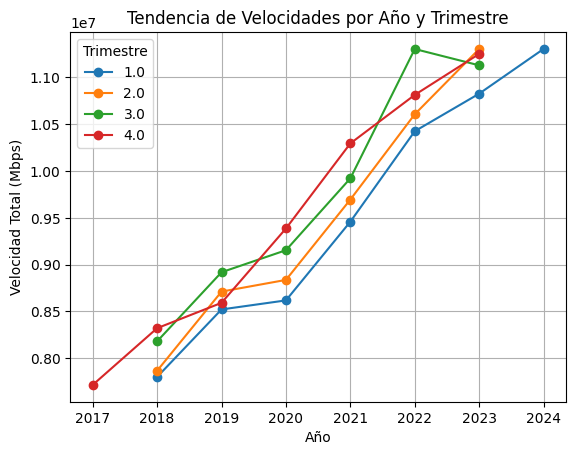

In [24]:
# Agregar columna de velocidad total
df_02['Total_Velocidades'] = df_02.filter(like='Mbps').sum(axis=1)

# Agrupar por año y trimestre
time_trend = df_02.groupby(['Año', 'Trimestre'])['Total_Velocidades'].sum().unstack()

# Graficar
plt.figure(figsize=(14, 8))
time_trend.plot(kind='line', marker='o')
plt.title('Tendencia de Velocidades por Año y Trimestre')
plt.xlabel('Año')
plt.ylabel('Velocidad Total (Mbps)')
plt.legend(title='Trimestre')
plt.grid(True)
plt.show()


### Conclusion
"Al observar el gráfico de tendencia de velocidades por año y trimestre, puedo ver cómo ha cambiado la velocidad total de internet a lo largo del tiempo. Cada línea representa un trimestre diferente, y puedo notar las fluctuaciones en las velocidades totales a lo largo de los años. Los picos y valles en las líneas indican períodos en los que las velocidades de internet aumentaron o disminuyeron. Este gráfico me ayuda a identificar patrones estacionales y tendencias a largo plazo en la conectividad de internet. También puedo ver si hubo mejoras consistentes en la velocidad de internet o si hubo períodos de estancamiento. En general, me da una buena perspectiva de cómo ha evolucionado la velocidad total de internet en diferentes trimestres a lo largo de los años y puede guiarme en la evaluación del impacto de las inversiones en infraestructura o cambios en la oferta de servicios."

### . Mapa de Calor de Correlación entre Diferentes Tipos de Velocidades

**Idea**: Visualizar la correlación entre diferentes tipos de velocidades (por ejemplo, velocidades de bajada y subida) para entender cómo se relacionan entre sí.

**Gráfico**: Heatmap de la matriz de correlación de velocidades.

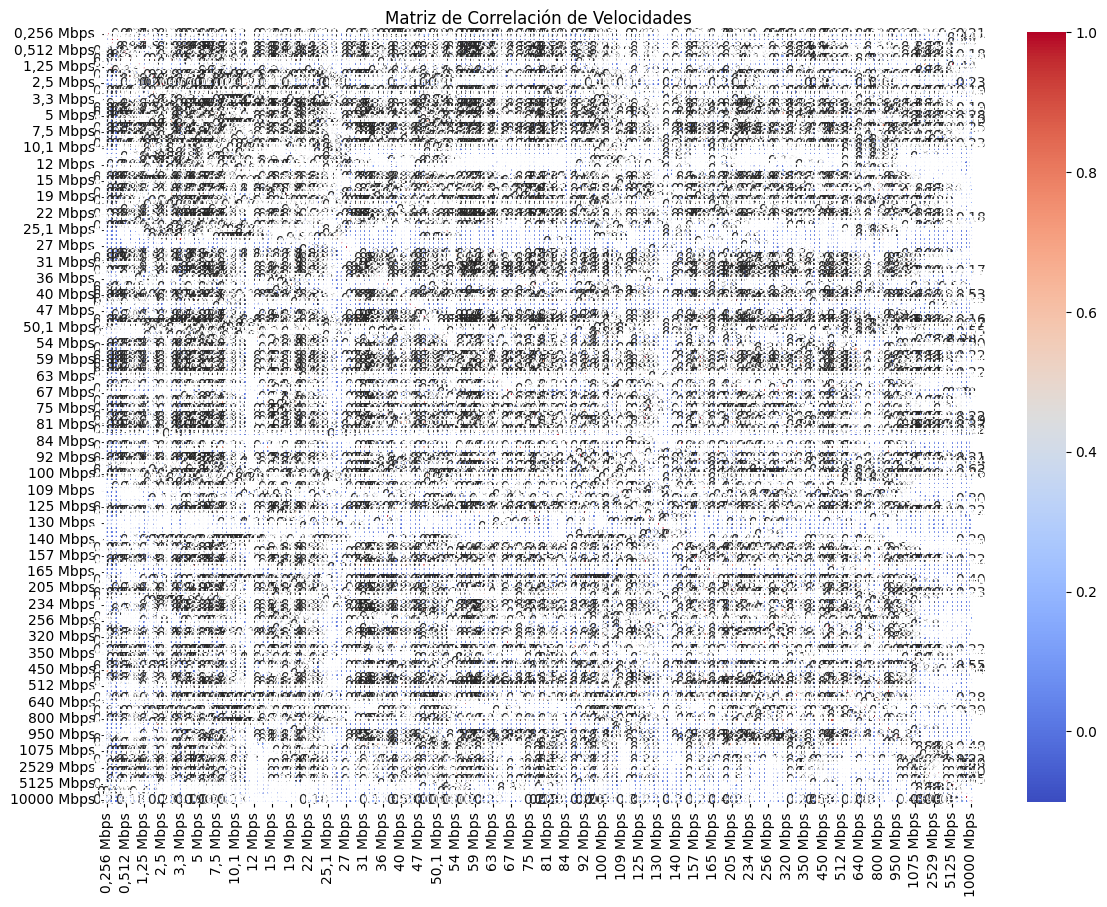

In [27]:
# Calcular la matriz de correlación
correlation_matrix = df_02.filter(like='Mbps').corr()

# Graficar
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación de Velocidades')
plt.show()


### Conclusion 
"Al revisar la matriz de correlación de velocidades, puedo ver cómo se relacionan entre sí las diferentes columnas de velocidad en mi conjunto de datos. Las correlaciones positivas indican que, en general, cuando una velocidad aumenta, también tiende a aumentar la velocidad en otras columnas. Por ejemplo, si hay una fuerte correlación entre dos velocidades, eso me sugiere que las provincias con mejores velocidades en una de estas categorías también suelen tener buenas velocidades en la otra. Esta matriz me proporciona una visión clara de las relaciones entre las distintas velocidades de internet, lo que me ayuda a entender mejor cómo están interrelacionadas y si hay patrones consistentes en los datos. Esto es útil para identificar qué velocidades están más estrechamente relacionadas y cómo se podrían influir mutuamente."


### Histograma de la Distribución de Velocidades
Idea: Mostrar cómo se distribuyen las velocidades en el dataset. Esto puede ayudar a identificar si hay una gran variación en las velocidades o si están agrupadas en ciertos rangos.

Gráfico: Histograma de la distribución de velocidades

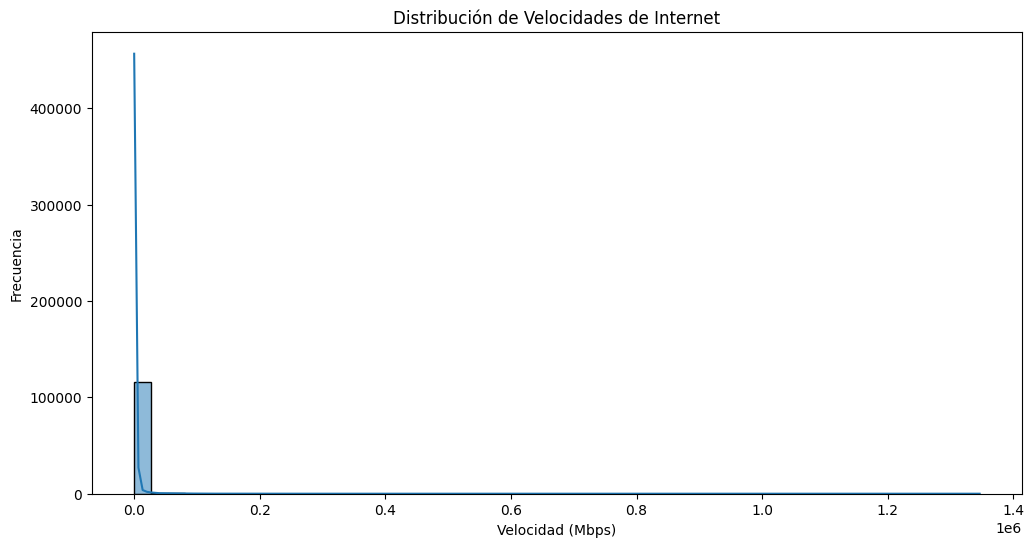

In [28]:
# Suponiendo que quieres analizar la distribución de velocidades en general
plt.figure(figsize=(12, 6))
sns.histplot(df_02.filter(like='Mbps').values.flatten(), bins=50, kde=True)
plt.title('Distribución de Velocidades de Internet')
plt.xlabel('Velocidad (Mbps)')
plt.ylabel('Frecuencia')
plt.show()


### Conclusion
"Al examinar el histograma de la distribución de velocidades de internet, puedo ver cómo se distribuyen las velocidades a lo largo del rango observado. La curva de densidad suavizada (KDE) me ayuda a entender la forma general de la distribución. Puedo notar si hay una concentración significativa de datos en ciertos rangos de velocidad, lo que indica en qué velocidades se encuentran más frecuentemente los datos. Además, veo si hay alguna tendencia hacia velocidades más bajas o más altas. La forma del histograma y la curva KDE me permiten identificar si la mayoría de las velocidades se agrupan en torno a ciertos valores y si hay alguna anomalía o valores extremos que podrían necesitar atención. Este análisis me da una visión clara de la distribución general de las velocidades de internet en mi conjunto de datos."

## Carga de Datos

Hemos cargado los datos desde el archivo Excel `Velocidad_por_prov.xlsx`. 

In [40]:
# Cargar el archivo Excel con las dos primeras hojas
file_path = 'Internet.xlsx'

# Cargar solo las dos primeras hojas en DataFrames separados
df_03 = pd.read_excel(file_path, sheet_name=3)


In [41]:
df_03

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.130000
1,2024,1,Capital Federal,229.940000
2,2024,1,Catamarca,91.450000
3,2024,1,Chaco,107.510000
4,2024,1,Chubut,20.500000
...,...,...,...,...
979,2014,1,Santa Cruz,3.315991
980,2014,1,Santa Fe,3.147407
981,2014,1,Santiago Del Estero,2.949472
982,2014,1,Tierra Del Fuego,3.446888


### Distribución General de la Velocidad de Bajada
Gráfico Sugerido: Histograma y Boxplot

Histograma: Muestra la distribución de las velocidades de bajada (Mbps (Media de bajada)) para entender su distribución general y posibles sesgos.

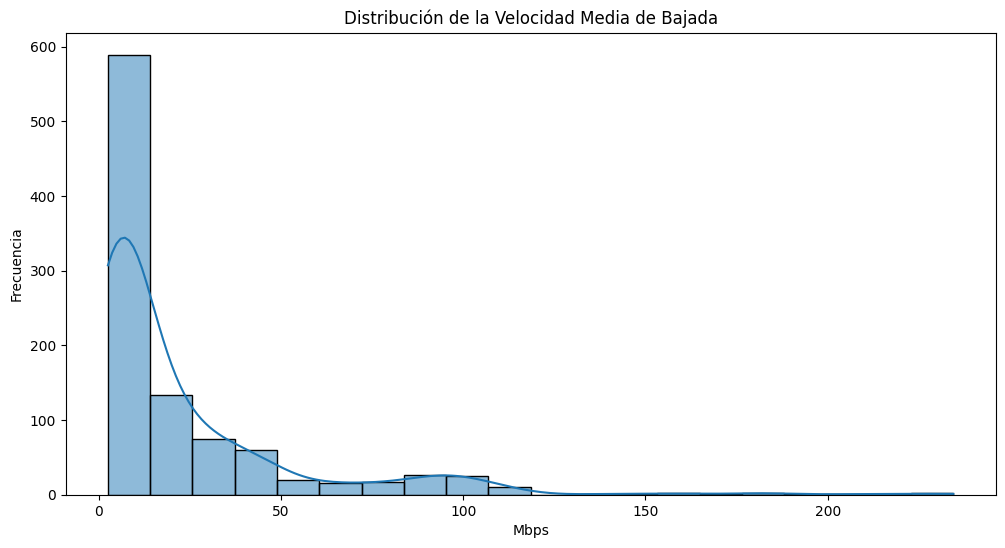

In [42]:
plt.figure(figsize=(12, 6))
sns.histplot(df_03['Mbps (Media de bajada)'], bins=20, kde=True)
plt.title('Distribución de la Velocidad Media de Bajada')
plt.xlabel('Mbps')
plt.ylabel('Frecuencia')
plt.show()


### Conclusion 
"Al observar el histograma de la distribución de la velocidad media de bajada, puedo ver cómo se distribuyen las velocidades de bajada en mi conjunto de datos. La curva de densidad (KDE) me muestra la forma general de la distribución. Puedo identificar si hay una concentración de datos en torno a ciertas velocidades, lo que indica que esas velocidades son las más comunes. Si la distribución está sesgada hacia la izquierda o derecha, eso me dice si la mayoría de las velocidades de bajada son más bajas o más altas. También puedo ver si hay valores extremos o picos en la distribución. En general, este gráfico me ayuda a entender la frecuencia con la que se presentan diferentes velocidades de bajada y cómo se distribuyen a lo largo del rango observado."

Boxplot: Identifica valores atípicos en la distribución de Mbps (Media de bajada).

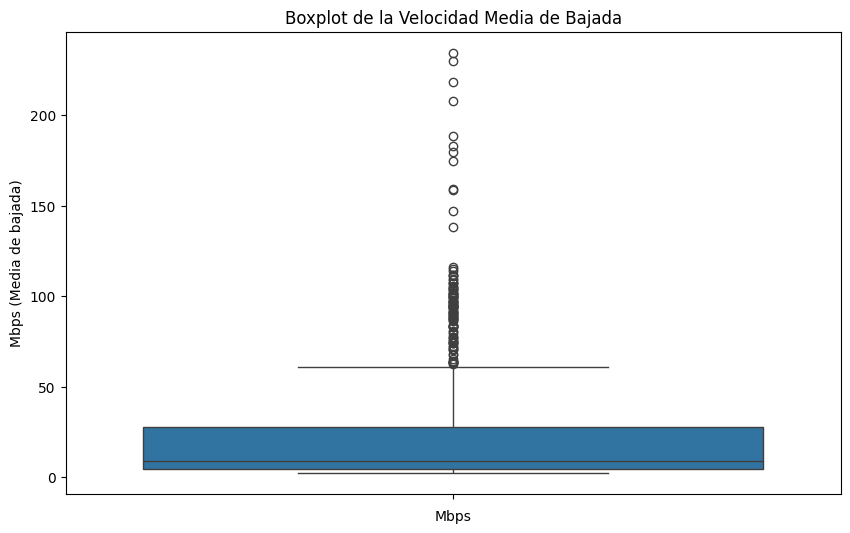

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(df_03['Mbps (Media de bajada)'])
plt.title('Boxplot de la Velocidad Media de Bajada')
plt.xlabel('Mbps')
plt.show()


### Conclusion
"Al revisar el boxplot de la velocidad media de bajada, puedo ver la distribución de las velocidades de bajada a través de los diferentes cuartiles. El gráfico me muestra la mediana, los cuartiles y los posibles valores atípicos. La caja central me indica el rango intercuartílico donde se concentra la mayoría de los datos, mientras que los bigotes muestran el rango de variación dentro de un rango esperado. Los puntos fuera de los bigotes representan valores atípicos, que podrían ser velocidades de bajada inusualmente altas o bajas. Este boxplot me ayuda a identificar la variabilidad de las velocidades de bajada y a detectar cualquier anomalía o valores extremos que podrían necesitar una investigación adicional. En general, me proporciona una visión clara de cómo se distribuyen las velocidades de bajada y qué tan consistentes son en mi conjunto de datos."

### Distribución de la Velocidad de Bajada por Provincia
Gráfico Sugerido: Boxplot por Provincia

Boxplot por Provincia: Compara la distribución de Mbps (Media de bajada) entre diferentes provincias para identificar diferencias regionales

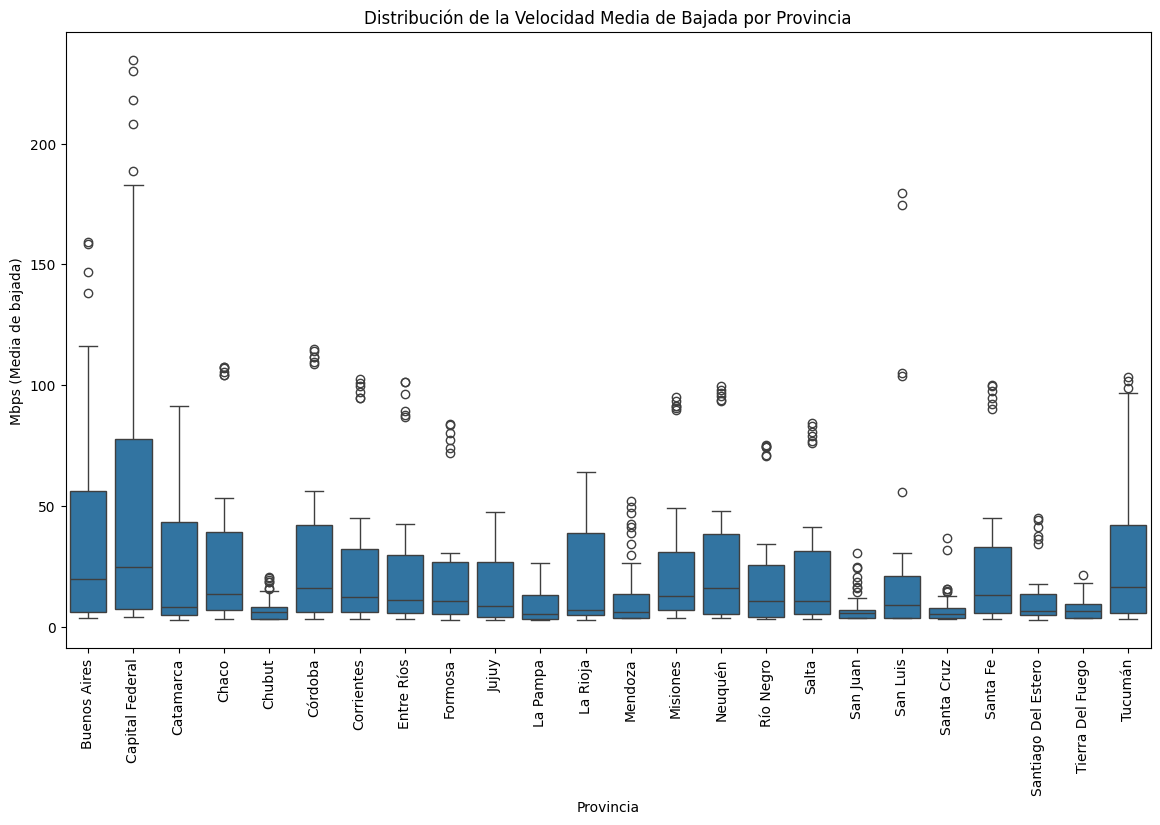

In [45]:

plt.figure(figsize=(14, 8))
sns.boxplot(x='Provincia', y='Mbps (Media de bajada)', data=df_03)  
plt.title('Distribución de la Velocidad Media de Bajada por Provincia')
plt.xticks(rotation=90)
plt.xlabel('Provincia')
plt.ylabel('Mbps (Media de bajada)')
plt.show()


### Conclusion
"Al observar el boxplot de la velocidad media de bajada por provincia, puedo ver cómo varía la velocidad de bajada en diferentes provincias. Cada caja representa la distribución de velocidades en una provincia específica, mostrando la mediana, los cuartiles y los posibles valores atípicos. Puedo identificar provincias con alta variabilidad en las velocidades de bajada, donde las cajas son más largas y los bigotes más extendidos, así como provincias con velocidades más consistentes. Los valores atípicos me llaman la atención, ya que podrían indicar áreas con velocidades de bajada inusualmente altas o bajas. Este gráfico me permite comparar directamente las velocidades de bajada entre provincias y destacar cuáles tienen mejores o peores rendimientos en términos de conectividad."

### Tendencias Temporales en la Velocidad de Bajada
Gráfico Sugerido: Gráfico de Línea por Año y Trimestre

Gráfico de Línea: Muestra cómo ha cambiado la velocidad media de bajada a lo largo del tiempo, dividido por año y trimestre

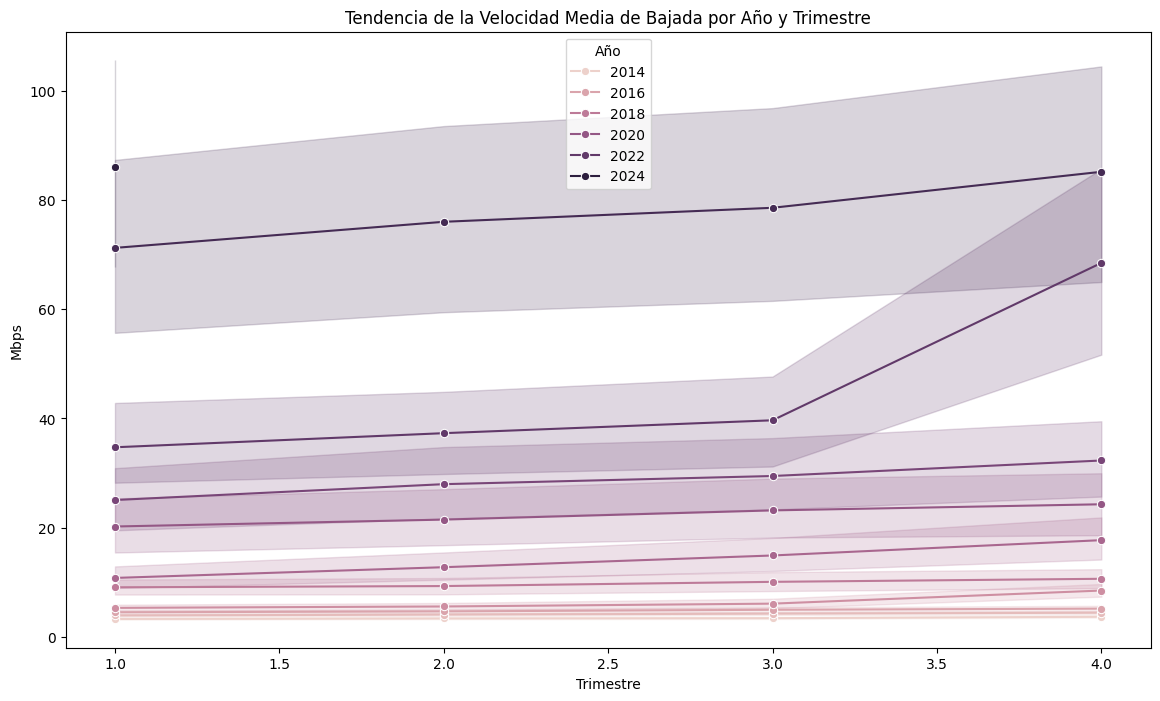

In [46]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Trimestre', y='Mbps (Media de bajada)', hue='Año', data=df_03, marker='o')
plt.title('Tendencia de la Velocidad Media de Bajada por Año y Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Mbps')
plt.legend(title='Año')
plt.show()


### Conclusion
"Al observar el gráfico de tendencia de la velocidad media de bajada por año y trimestre, puedo ver cómo ha cambiado la velocidad de bajada a lo largo del tiempo. Cada línea representa un año diferente, y puedo seguir cómo evolucionan las velocidades trimestre a trimestre. Los puntos marcados en el gráfico me permiten ver las fluctuaciones específicas en cada trimestre y año. Puedo identificar patrones estacionales o tendencias generales, como mejoras continuas o períodos de estancamiento en la velocidad de bajada. La comparación entre los años me ayuda a evaluar si ha habido un progreso significativo en la velocidad de internet a lo largo de los trimestres y cómo las inversiones en infraestructura podrían haber influido en estos cambios."

### Comparación de la Velocidad de Bajada entre Trimestres
Gráfico Sugerido: Boxplot por Trimestre

Boxplot por Trimestre: Compara la distribución de Mbps (Media de bajada) entre los diferentes trimestres del año.

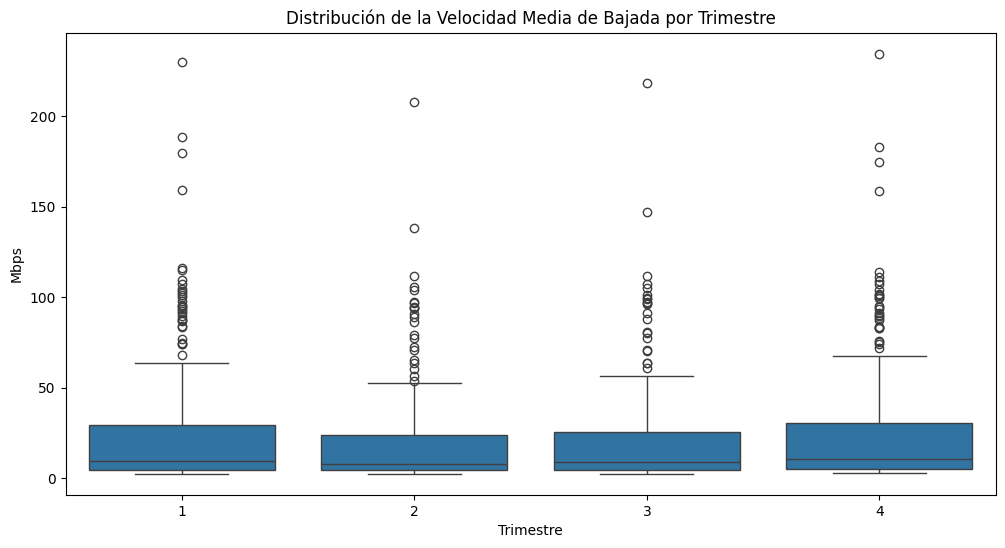

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Trimestre', y='Mbps (Media de bajada)', data=df_03)
plt.title('Distribución de la Velocidad Media de Bajada por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Mbps')
plt.show()


###  Conclusion
"Al analizar el boxplot de la velocidad media de bajada por trimestre, puedo ver cómo se distribuyen las velocidades de bajada a lo largo de los diferentes trimestres del año. Cada caja representa la variabilidad de las velocidades en un trimestre específico, mostrando la mediana, los cuartiles y los valores atípicos. Puedo observar si hay trimestres en los que las velocidades son consistentemente más altas o más bajas, y si hay diferencias significativas entre trimestres. Las cajas más largas indican mayor variabilidad en las velocidades, mientras que las más cortas muestran menor variabilidad. También puedo identificar valores atípicos, que podrían indicar anomalías en las velocidades durante ciertos trimestres. Este gráfico me proporciona una visión clara de cómo cambian las velocidades de bajada a lo largo del año y me ayuda a detectar patrones estacionales o tendencias en la conectividad."

 ### Análisis de Correlación
Gráfico Sugerido: Heatmap de Correlación

Heatmap de Correlación: Aunque tu dataset tiene pocas variables numéricas, este gráfico puede ser útil si agregas más variables en el futuro o si el análisis incluye otras métricas relacionadas.

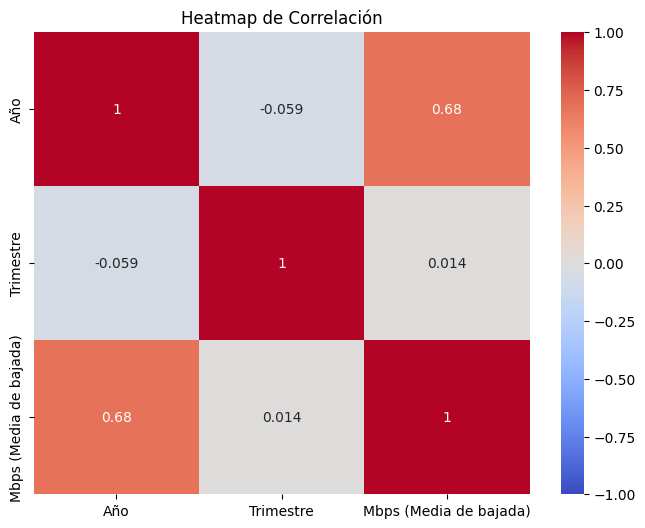

In [48]:
plt.figure(figsize=(8, 6))
corr_matrix = df_03[['Año', 'Trimestre', 'Mbps (Media de bajada)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap de Correlación')
plt.show()


### Conclusion
"Al revisar el heatmap de correlación, puedo ver las relaciones entre el Año, el Trimestre y la Velocidad Media de Bajada. Las celdas del mapa muestran cómo se correlacionan entre sí estas variables. Las correlaciones positivas están representadas por colores cálidos y las negativas por colores fríos. Por ejemplo, si veo una alta correlación positiva entre el Año y la Velocidad Media de Bajada, eso sugiere que las velocidades de bajada tienden a aumentar con el tiempo. Si la correlación entre el Trimestre y la Velocidad Media de Bajada es alta, eso puede indicar que hay patrones estacionales en las velocidades. Esta visualización me ayuda a identificar qué variables están más fuertemente relacionadas y cómo estas relaciones pueden influir en la interpretación de los datos. Me permite entender mejor las interacciones entre el tiempo y la velocidad de bajada."

### Análisis de Datos Faltantes y Duplicados
Gráficos Sugeridos: Gráfico de Barras para Valores Faltantes

Gráfico de Barras para Valores Faltantes: Muestra la cantidad de valores faltantes por columna, si los hay.

In [50]:

# Calcular valores faltantes
missing_values = df_03.isnull().sum()

# Filtrar columnas con valores faltantes
missing_values = missing_values[missing_values > 0]

# Verificar si hay columnas con valores faltantes
if not missing_values.empty:
    plt.figure(figsize=(12, 6))
    missing_values.plot(kind='bar')
    plt.title('Cantidad de Valores Faltantes por Columna')
    plt.xlabel('Columna')
    plt.ylabel('Cantidad de Valores Faltantes')
    plt.show()
else:
    print("No hay valores faltantes en el DataFrame.")

No hay valores faltantes en el DataFrame.


Gráfico Sugerido: Gráfico de Barras para Registros Duplicados

Gráfico de Barras para Duplicados: Muestra el conteo de registros duplicados en el dataset, si los hay.

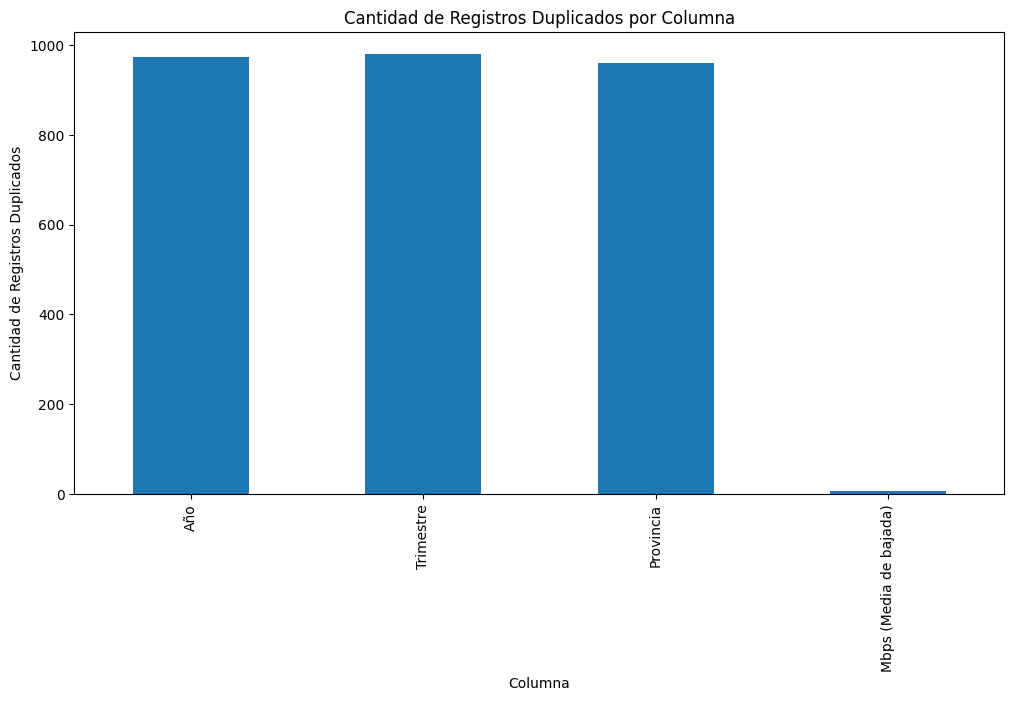

In [52]:
# Contar duplicados por columna
duplicates_per_column = df_03.apply(lambda x: x.duplicated().sum())

# Filtrar columnas con duplicados
duplicates_per_column = duplicates_per_column[duplicates_per_column > 0]

# Verificar si hay columnas con duplicados
if not duplicates_per_column.empty:
    plt.figure(figsize=(12, 6))
    duplicates_per_column.plot(kind='bar')
    plt.title('Cantidad de Registros Duplicados por Columna')
    plt.xlabel('Columna')
    plt.ylabel('Cantidad de Registros Duplicados')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("No hay registros duplicados en ninguna columna del DataFrame.")


### Conclusion
"Al observar el gráfico de la cantidad de registros duplicados por columna, puedo ver en qué columnas hay datos duplicados y cuántos registros duplicados existen en cada una. Las barras me muestran claramente la cantidad de duplicados para cada columna. Si una columna tiene una barra alta, eso indica que hay muchos registros duplicados en esa columna específica, lo que podría afectar la calidad y precisión de los análisis que realice con estos datos. Si no hay ninguna barra en el gráfico, significa que no tengo registros duplicados en ninguna columna, lo cual es positivo para la integridad de los datos. Este análisis me ayuda a identificar y abordar cualquier problema relacionado con duplicados para asegurarme de que mis datos sean confiables y útiles para el análisis."